In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad

**Beale's function**:

$$
f(x, y) = (1.5 - x + xy)^2 + (2.25 - x + xy^2)^2 + (2.625 - x + xy^3)^2
$$

In [2]:
f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

**Plot the function**

In [3]:
xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

z = f(x, y)

minima = np.array([3., .5])

In [4]:
minima_ = minima.reshape(-1, 1)
minima_

array([[3. ],
       [0.5]])

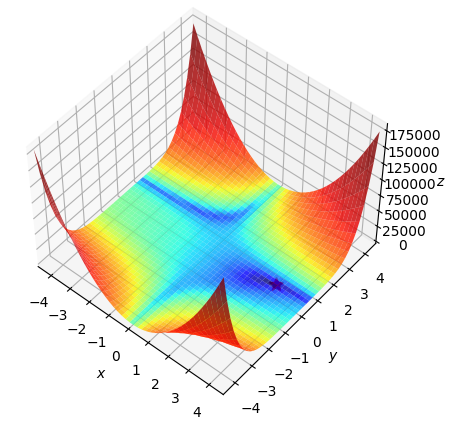

In [5]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

**Show the 2D level sets and their negative gradients**

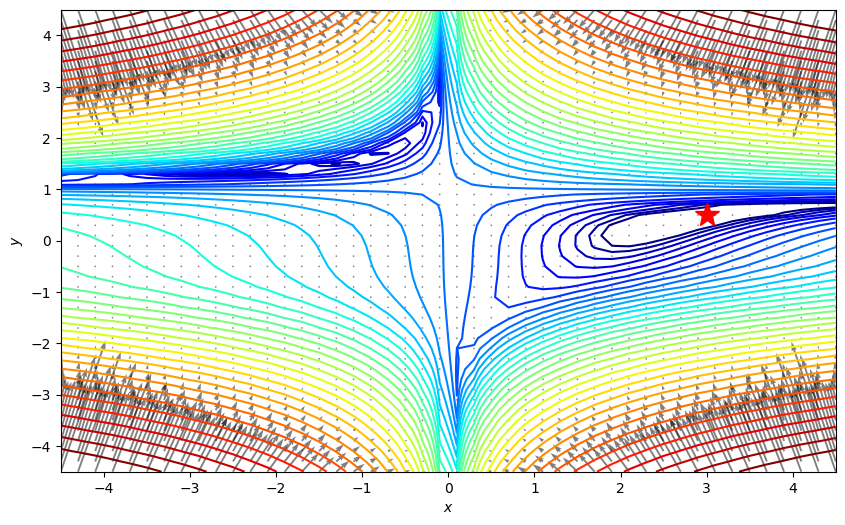

In [6]:
dz_dx = elementwise_grad(f, argnum=0)(x, y)
dz_dy = elementwise_grad(f, argnum=1)(x, y)

fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(x, y, x - dz_dx, y - dz_dy, alpha=.5)
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

**Optimize the function**

In [7]:
#f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

In [8]:
params = torch.tensor([[0.1], [0.9]], requires_grad = True)
X=params[0]
Y=params[1]
path_list=[]  
path_list.append(params.detach().numpy().copy())

optimizer = torch.optim.Adam([params], lr=0.01)
steps = 2000
for i in range(steps):
  optimizer.zero_grad()
  my_f = (1.5-X+X*Y)**2+(2.25-X+X*Y**2)**2+(2.625-X+X*Y**3)**2  
  my_f.backward()
  optimizer.step()
  path_list.append(params.detach().numpy().copy())
  if i%100 == 0:
    print(f'At step {i+1 :4} x={str([round(params[i].item(), 3) for i in range(params.numel())]) :16}'\
          f' and the function value is {my_f.item(): 0.4f}.' )

At step    1 x=[0.11, 0.89]     and the function value is  13.9465.
At step  101 x=[1.202, 0.006]   and the function value is  3.2671.
At step  201 x=[1.818, 0.065]   and the function value is  0.8956.
At step  301 x=[2.151, 0.212]   and the function value is  0.3241.
At step  401 x=[2.357, 0.294]   and the function value is  0.1450.
At step  501 x=[2.496, 0.346]   and the function value is  0.0746.
At step  601 x=[2.598, 0.382]   and the function value is  0.0418.
At step  701 x=[2.676, 0.408]   and the function value is  0.0246.
At step  801 x=[2.738, 0.427]   and the function value is  0.0150.
At step  901 x=[2.787, 0.442]   and the function value is  0.0093.
At step 1001 x=[2.828, 0.454]   and the function value is  0.0058.
At step 1101 x=[2.861, 0.463]   and the function value is  0.0036.
At step 1201 x=[2.889, 0.471]   and the function value is  0.0023.
At step 1301 x=[2.911, 0.477]   and the function value is  0.0014.
At step 1401 x=[2.93, 0.482]    and the function value is  0.

In [9]:
#The path during the optimization

skip=50
path_ = np.squeeze(np.array(path_list).T)
path = path_[:,::skip]
print(path.shape)


(2, 41)


**Show the path**

(-4.5, 4.5)

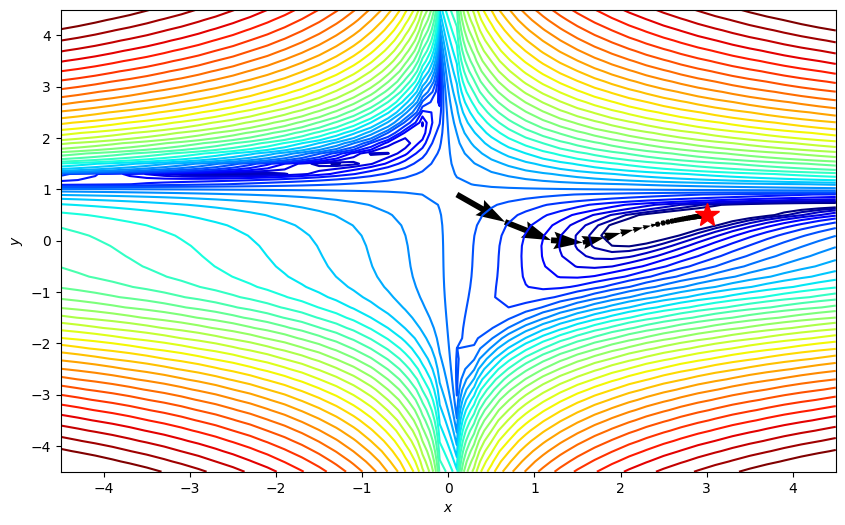

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

**2D Animation**

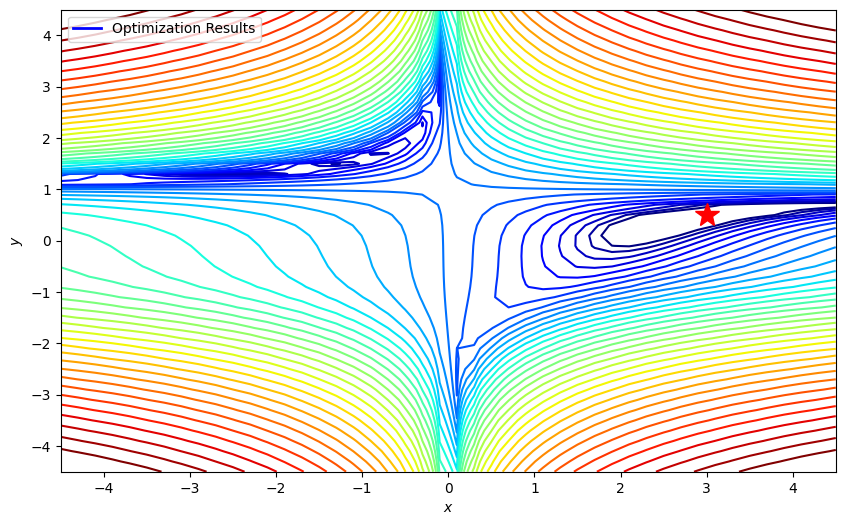

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=18)

line, = ax.plot([], [], 'b', label='Optimization Results', lw=2)
point, = ax.plot([], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left')

In [12]:
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def animate(i):
    line.set_data(*path[::,:i])
    point.set_data(*path[::,i-1:i])
    return line, point

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60, 
                               repeat_delay=5, blit=True)



In [13]:
HTML(anim.to_html5_video())

3D Animation

(-4.5, 4.5)

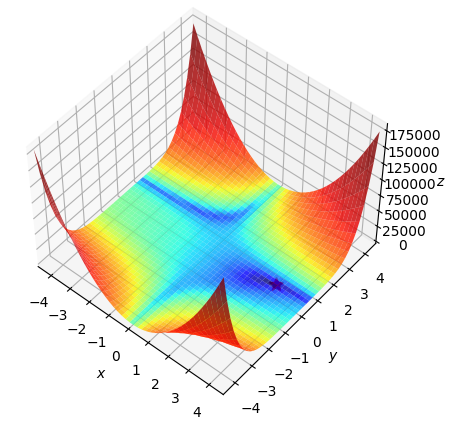

In [14]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

line, = ax.plot([], [], [], 'b', label='Newton-CG', lw=2)
point, = ax.plot([], [], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

In [15]:
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

def animate(i):
    line.set_data(path[0,:i], path[1,:i])
    line.set_3d_properties(f(*path[::,:i]))
    point.set_data(path[0,i-1:i], path[1,i-1:i])
    point.set_3d_properties(f(*path[::,i-1:i]))
    return line, point

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60, 
                               repeat_delay=5, blit=True)

In [16]:
HTML(anim.to_html5_video())